## 提出问题：
#### 问题1：船上男女比例和生还比例各是多少
#### 问题2: 船上各年龄段的人数分布情况如何
#### 问题3：年龄和生存率是否有相关性   
#### 问题4：社会地位和生存率是否会有相关性
#### 问题5：性别和生还率是否有相关性

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

titanic_data=pd.read_csv('titanic-data.csv')

### 预览信息

In [2]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 测试输出社会地位字段

In [4]:
titanic_data['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

### 测试输出社会地位的总数，均值，标准差，最大值，最小值。

In [5]:
titanic_data['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

### 根据以上的输出信息，可以看出在年龄字段信息只有714条，缺少了大量的数据，而船舱Cabin字段缺少的最多，登录地点Embarked只缺少两条信息，Cabin字段，Embarker字段对于我们研究问题属于无关字段，所以讲起删除掉,名字,车票信息,票价也属于无关字段，所以也将其删除.

In [6]:
cols=['Name','Ticket','Fare','Cabin','Embarked']
td=titanic_data.drop(cols,axis=1)

In [7]:
td.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


### 由于年龄行有缺失的数据，会影响到整体数据的分析。所以我们先分析社会地位与生还率的高低。首先我们分析船上所有人的社会地位分布情况，我们首先做一维数据分析

In [8]:
td['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [9]:
#定义分类统计函数，通过传入DataFrame,要分类字段
def classification(td,filed1,filed2):
    td.groupby(filed1)[filed2].count().plot(kind='bar')
    plt.title(filed1+'Count')
    plt.ylabel('Count')
    plt.show()

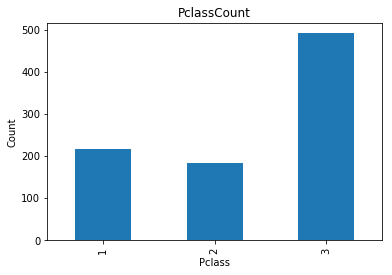

In [10]:
classification(td,'Pclass','PassengerId')

### 由图可知50%左右人的社会地位都处于最高，剩下社会级别为1与2的分别占到25%左右。
### 下面我们再去看看船上男女比例个是多少，生还比例是多少。

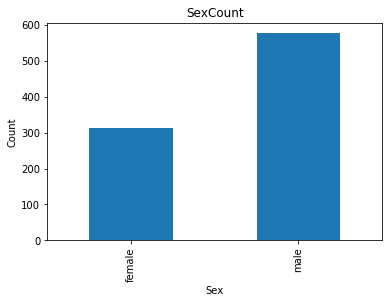

In [11]:
classification(td,'Sex','PassengerId')

### 根据上述的计算可以看出船上男女比例分别占64.8%与35.2%.,我们下面继续统计船上生还人数与死亡人数

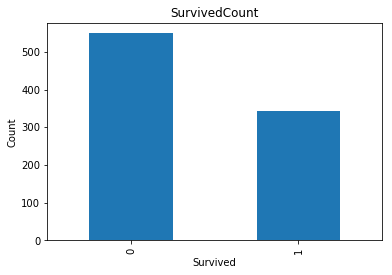

In [12]:
classification(td,'Survived','PassengerId')

### 根据直方图可以看出大约有35%的人生还了下来，有大约65%死亡。
### 下面我们统计年龄的分布情况，但是由于年龄有缺失的值，所以我们想办法将其恢复。

In [13]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 48.8+ KB


In [14]:
td['Age']=td['Age'].interpolate()
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 48.8+ KB


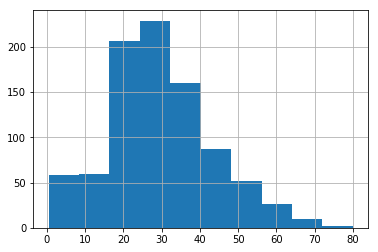

In [15]:
td_by_age=pd.Series(td['Age'])
td_by_age.hist()
plt.show()

## 1.缺失数据恢复
###   age变量
        使用interpolate()函数将缺少的数据进行模拟恢复
##  2.总结
    1.根据图形显示可以看出大部分的人年龄处于18-40岁之间，而且年轻人占的比较多。
    2.根据以上的信息，我们需要将作出二维的数据分析，判断相关变量的相关性
    3.首先我们分析性别与存活率是否有相关性

In [16]:
#定义分类统计函数，通过传入DataFrame,分类字段,形成堆柱形图
def classification_two(td,filed1,filed2):
    td.groupby([filed1,filed2])[filed2].count().unstack().plot(kind='bar',stacked='Ture')
    plt.title(filed1+' about '+ filed2)
    plt.ylabel('Count')
    plt.show()

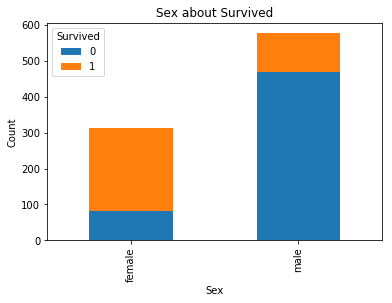

In [17]:
classification_two(td,'Sex','Survived')

## 1.数据处理与可视化
    将以男性和女性进行分类，然后再比较其中的生还率
##  2.结论
    由图可以看出男性生还率要低于女性生还率，但是由于该数据的缺失的，数据是由我们模拟添加上去的，所以和实际的情况会有些差距，所以该结论还有很大的不确定性，仍然需要考证。

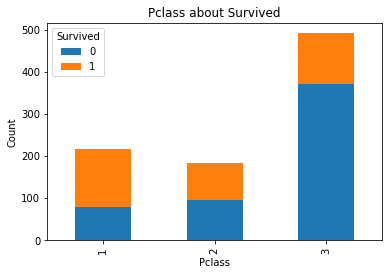

In [18]:
classification_two(td,'Pclass','Survived')

## 1.数据处理与可视化
    将以社会等级进行分类，然后再比较其中的生还率
##  2.结论
    由图可以看出社会地位低的生还率较高，社会地位高的生还率较低，社会地位中的居中生还率居中

In [ ]:
#定义判断相关性函数
def correlation(x, y):
	std_x = (x - x.mean()) / x.std(ddof=0)
	std_y = (y - y.mean()) / y.std(ddof=0)
	return (std_x*std_y).mean()

In [20]:
correlation(['Pclass'],td['Survived'])

NameError: name 'correlation' is not defined

### 根据之前的统计可以看出社会地位低的人大部分都存活了下来，而社会地位高的人大部分却没有存活下来,所以得出社会地位低的人可能存活率更高的假设。
### 根据上诉计算可以看出在已经存活的男性为109人，女性为233人，在之前的统计过程中男性共有577人，女性有314人，所以可以得出结论女性的生还率更高一些，男性生还率更低，说明大家在船上遵循了让妇女和儿童优先上救生艇。
### 之后我们判断相关性，判断社会地位与生还率，年龄与生还率

In [ ]:
td_filter=td[td.Survived > 0 ]
td_filter.info()
td_filter.head()

In [ ]:
td_filter['Age'].hist()
plt.show()

In [ ]:
correlation(td['Age'],td['Survived'])

### 在已经存活的人中，年龄的分布与船上所有年龄人的分布情况基本相同，年龄在18-40岁之间的人更容易存活下来，但是由于数据的残缺的，所以带有一定的不确定性。

## 对提出问题作出回答
#### 问题1：船上男女比例和生还比例各是多少
    答：男女比例分别是65%与35%，生还比例为35%,死亡比例为65%。
#### 问题2: 船上各年龄段的人数分布情况如何
    答:年龄呈正太分布，其中18-40岁的比例占据大部分。
#### 问题3：年龄和生存率是否有相关性 
    答:根据计算得到负值，比例系数为0.06，相关性较小。
#### 问题4：社会地位和生存率是否会有相关性
    答:根据计算得到负值，比例系数为0.338，具有一点的相关性，呈负相关。
#### 问题5：性别和生还率是否有相关性
    答:根据得到的堆叠图，可以看出男性与女性的生还死亡比例不一致，所以具有一定的相关性。
### 总结
    1.本次数据包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息
    2.由于分不清是乘客还是船员，所以对生还率的判断还是有一定影响，因为船员可能对船更加熟悉，水性更好，更能生存下来。
    3.本次得到的数据均有缺失，尤其在年龄这一块，数据的模拟添加上去的，所以对于实际的分析会有一定的影响
    4.对于男女比例分布，为能得到船上所有男女数据的，不能完全确定男女比例。
    5.本次所用的数据占据总样本的40%未能占据到一半以上，代表性不强。